In [2]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv("/content/Afternoon-28th-June.csv")

In [5]:
df.head()

,Name (Original Name),User Email,Join Time,Leave Time,Duration (Minutes),Guest,In Waiting Room
0,Krisha Singh (Akshita Roshan),akshita@agie.ai,06/28/2024 03:57:40 PM,06/28/2024 04:19:20 PM,22,No,No
1,Tanuja,NaN,06/28/2024 03:57:49 PM,06/28/2024 03:58:04 PM,1,Yes,Yes
2,Yash Goel,NaN,06/28/2024 03:57:53 PM,06/28/2024 03:58:09 PM,1,Yes,Yes
3,Darshan,NaN,06/28/2024 03:57:53 PM,06/28/2024 03:58:09 PM,1,Yes,Yes
4,sneha pawar,NaN,06/28/2024 03:57:56 PM,06/28/2024 03:58:20 PM,1,Yes,Yes


In [10]:
import pandas as pd

# Assuming 'Duration' is in HH:MM:SS format and exists in your DataFrame
# Convert the 'Duration' column to timedelta for proper aggregation
df['Duration (Minutes)'] = pd.to_timedelta(df['Duration (Minutes)'])

# Group by 'Name (Original Name)' and calculate the total duration
total_durations = df.groupby('Name (Original Name)')['Duration (Minutes)'].sum().reset_index()

# Print the result
print(total_durations)

                 Name (Original Name)        Duration (Minutes)
0                 200636_Nikhil Singh 0 days 00:00:00.000000001
1                  2255 _Tanisha Basu 0 days 00:00:00.000000077
2                              Aayush 0 days 00:00:00.000000087
3   Aayush (Aayush Gulati (B21BB002)) 0 days 00:00:00.000000009
4                      Abhishek Reddy 0 days 00:00:00.000000014
..                                ...                       ...
63                          adithia v 0 days 00:00:00.000000098
64                             pratik 0 days 00:00:00.000000098
65                      satwik tiwari 0 days 00:00:00.000000005
66                      shivam pandey 0 days 00:00:00.000000086
67                        sneha pawar 0 days 00:00:00.000000095

[68 rows x 2 columns]


In [13]:
# Ensure the 'Duration (Minutes)' column is in numerical format
df['Duration (Minutes)'] = pd.to_numeric(df['Duration (Minutes)'], errors='coerce')

# Calculate the total duration of attendance for the entire batch
total_batch_duration = df['Duration (Minutes)'].sum()

# Print the result
print(f'Total Duration of Attendance for the Batch: {total_batch_duration} minutes')

Total Duration of Attendance for the Batch: 4783 minutes


In [14]:
# Ensure the 'Duration (Minutes)' column is in numerical format
df['Duration (Minutes)'] = pd.to_numeric(df['Duration (Minutes)'], errors='coerce')

# Calculate the average duration of attendance for the entire batch
average_batch_duration = df['Duration (Minutes)'].mean()

# Print the result
print(f'Average Duration of Attendance for the Batch: {average_batch_duration} minutes')

Average Duration of Attendance for the Batch: 21.642533936651585 minutes


In [18]:


# Ensure the 'Duration (Minutes)' column is in numerical format
df['Duration (Minutes)'] = pd.to_numeric(df['Duration (Minutes)'], errors='coerce')

# Drop rows with missing 'Duration (Minutes)' data (if needed)
df.dropna(subset=['Duration (Minutes)'], inplace=True)

# Calculate standard deviation of attendance duration for each batch
std_dev_per_batch = df['Duration (Minutes)'].std()

# Print the result
print("Standard Deviation of Attendance Duration for Each Batch:")
print(std_dev_per_batch)

Standard Deviation of Attendance Duration for Each Batch:
23.234648908765887


In [23]:
# Ensure the 'Duration (Minutes)' column is in numerical format
df['Duration (Minutes)'] = pd.to_numeric(df['Duration (Minutes)'], errors='coerce')

# Drop rows with missing 'Duration (Minutes)' data (if needed)
df.dropna(subset=['Duration (Minutes)'], inplace=True)

# Calculate average duration for each batch
average_batch_duration = df['Duration (Minutes)'].mean()

# Add the average duration as a new column to the DataFrame
df['Average Duration'] = average_batch_duration # Add this line to create the missing column

# Calculate number of users attending more than average duration per batch
df['Above Average'] = df['Duration (Minutes)'] > df['Average Duration']
count_above_average = df['Above Average'].sum()

# Calculate percentage of users attending more than average duration per batch
total_users = len(df)  # Use len(df) to get the number of rows
percentage_above_average = (count_above_average / total_users) * 100

# Print the result
print("Percentage of Users Attending More than Average Duration for Each Batch:")
print(percentage_above_average)

Percentage of Users Attending More than Average Duration for Each Batch:
25.791855203619914


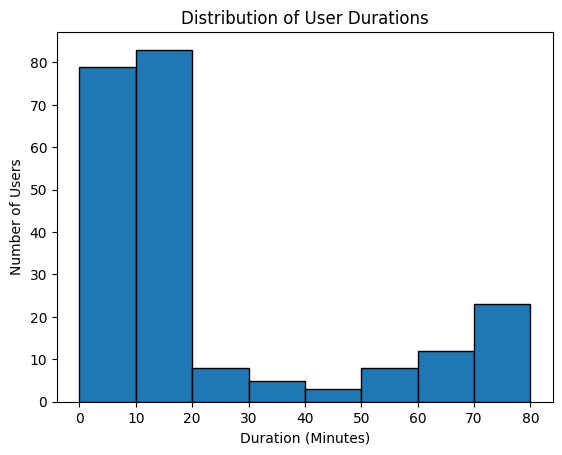

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Duration (Minutes)' is a numerical column

# Define the bin edges for the histogram
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]  # Customize as needed

# Plot the histogram
plt.hist(df['Duration (Minutes)'], bins=bins, edgecolor='black')

# Set labels and title
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Users')
plt.title('Distribution of User Durations')

# Show the plot
plt.show()

In [32]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Duration (Minutes)' is a numerical column

# Ensure the 'Duration (Minutes)' column is in numerical format
df['Duration (Minutes)'] = pd.to_numeric(df['Duration (Minutes)'], errors='coerce')

# Drop rows with missing 'Duration (Minutes)' data (if needed)
df.dropna(subset=['Duration (Minutes)'], inplace=True)

# Calculate metrics for each batch
results = []
for batch, group in df.groupby('Batch'):
    total_duration = group['Duration (Minutes)'].sum()
    average_duration = group['Duration (Minutes)'].mean()
    std_dev = group['Duration (Minutes)'].std()

    # Calculate percentage above average
    count_above_average = (group['Duration (Minutes)'] > average_duration).sum()
    total_users = len(group)
    percentage_above_average = (count_above_average / total_users) * 100

    results.append([batch, total_duration, average_duration, std_dev, percentage_above_average])

# Create a DataFrame from the results
result_df = pd.DataFrame(results, columns=['Batch', 'Total Duration', 'Average Duration', 'Standard Deviation', 'Percentage Above Average'])

# Print the results
print(result_df)

     Batch  Total Duration  Average Duration  Standard Deviation  \
0  Batch 1            4783         21.642534           23.234649   

   Percentage Above Average  
0                 25.791855  


Detailed Summary Report
-----------------------

Metrics per Batch:
         Total Duration  Average Duration  Standard Deviation  Total Users  \
Batch                                                                        
Batch 1            4783         21.642534           23.234649          221   

         Percentage Above Average  
Batch                              
Batch 1                 25.791855  

Overall Summary Statistics:
       Duration (Minutes)  Average Duration_x  Average Duration_y  \
count          221.000000        2.210000e+02        2.210000e+02   
mean            21.642534        2.164253e+01        2.164253e+01   
std             23.234649        7.121558e-15        7.121558e-15   
min              0.000000        2.164253e+01        2.164253e+01   
25%              5.000000        2.164253e+01        2.164253e+01   
50%             13.000000        2.164253e+01        2.164253e+01   
75%             24.000000        2.164253e+01        2.164253e+01   
max     

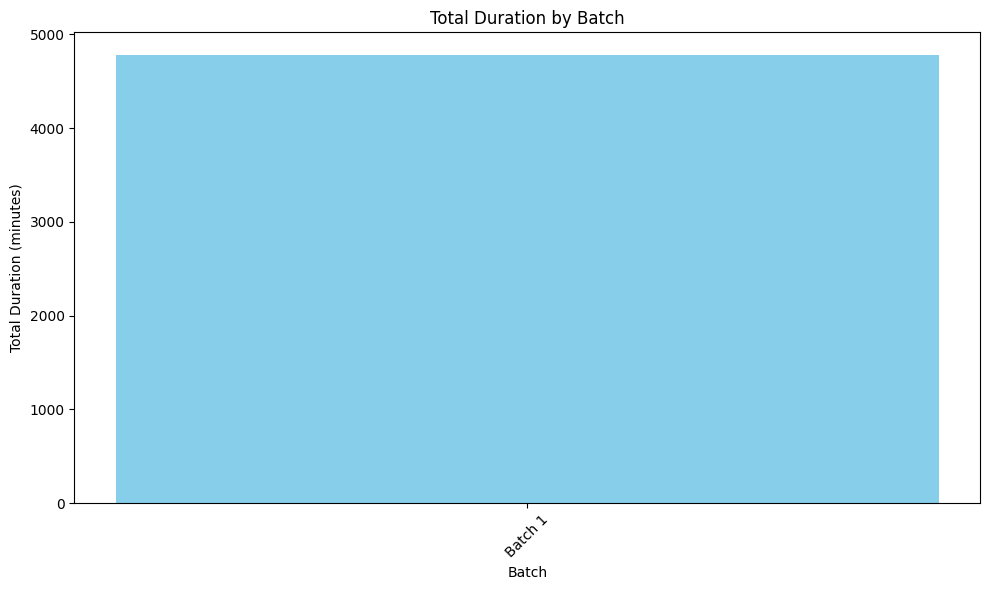

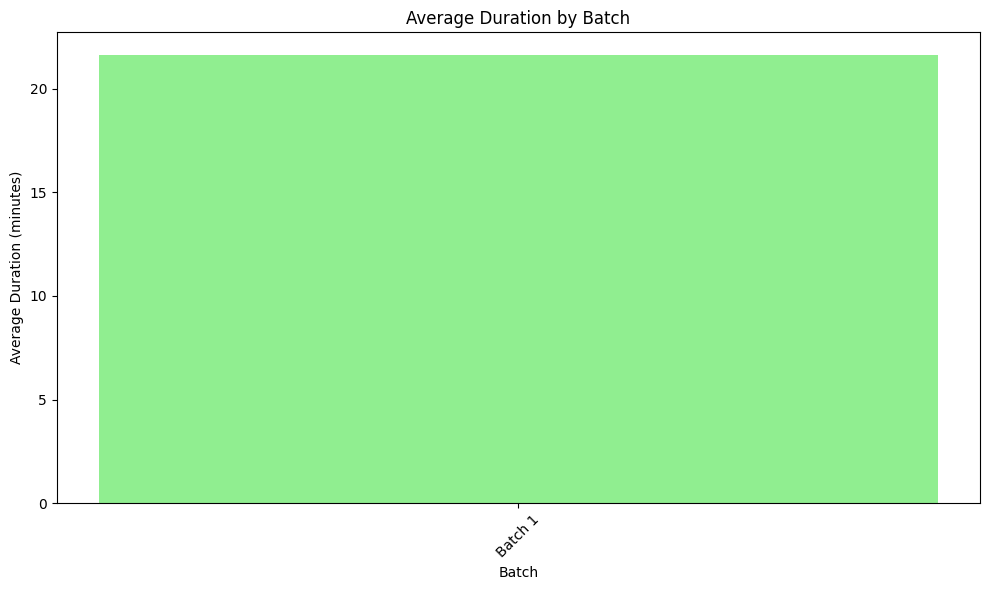

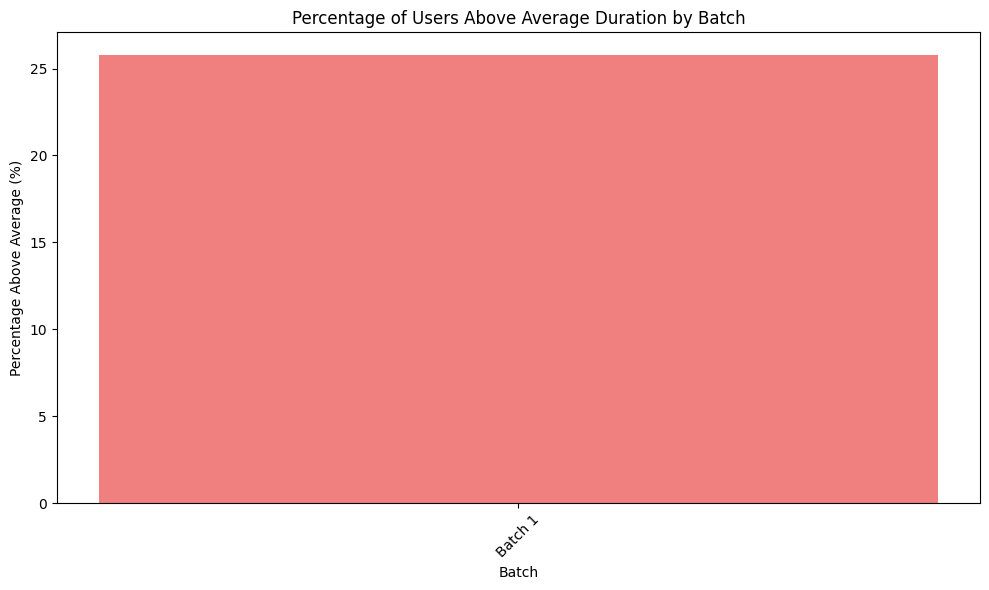

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'Duration (Minutes)' column is in numerical format
df['Duration (Minutes)'] = pd.to_numeric(df['Duration (Minutes)'], errors='coerce')

# Drop rows with missing 'Duration (Minutes)' data (if needed)
df.dropna(subset=['Duration (Minutes)'], inplace=True)

# Calculate metrics for each batch
metrics_per_batch = df.groupby('Batch').agg({
    'Duration (Minutes)': ['sum', 'mean', 'std'],
    'Name (Original Name)': 'size'  # Count users per batch
})

# Rename columns for clarity
metrics_per_batch.columns = ['Total Duration', 'Average Duration', 'Standard Deviation', 'Total Users']

# Calculate average duration for each batch
average_batch_duration = df.groupby('Batch')['Duration (Minutes)'].mean()

# Merge average duration back to the original DataFrame
df = pd.merge(df, average_batch_duration.rename('Average Duration'), on='Batch') # Add the 'Average Duration' column to the DataFrame

# Calculate number of users attending more than average duration per batch
df['Above Average'] = df['Duration (Minutes)'] > df['Average Duration']
count_above_average = df.groupby('Batch')['Above Average'].sum()

# Calculate percentage of users attending more than average duration per batch
total_users_per_batch = df.groupby('Batch').size()
percentage_above_average = (count_above_average / total_users_per_batch) * 100

# Add percentage above average to metrics_per_batch DataFrame
metrics_per_batch['Percentage Above Average'] = percentage_above_average

# Print detailed summary report
print("Detailed Summary Report")
print("-----------------------")

# Print metrics_per_batch
print("\nMetrics per Batch:")
print(metrics_per_batch)

# Additional insights or summaries can be printed here
# Example: Summary statistics for total dataset
print("\nOverall Summary Statistics:")
print(df.describe())

# Plotting total duration by batch
plt.figure(figsize=(10, 6))
plt.bar(metrics_per_batch.index, metrics_per_batch['Total Duration'], color='skyblue')
plt.xlabel('Batch')
plt.ylabel('Total Duration (minutes)')
plt.title('Total Duration by Batch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting average duration by batch
plt.figure(figsize=(10, 6))
plt.bar(metrics_per_batch.index, metrics_per_batch['Average Duration'], color='lightgreen')
plt.xlabel('Batch')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Duration by Batch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting percentage of users above average duration by batch
plt.figure(figsize=(10, 6))
plt.bar(metrics_per_batch.index, metrics_per_batch['Percentage Above Average'], color='lightcoral')
plt.xlabel('Batch')
plt.ylabel('Percentage Above Average (%)')
plt.title('Percentage of Users Above Average Duration by Batch')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()